In [ ]:
# Upload file to Google Drive, then save filepath

# NOTE: you'll need to change this variable to match your own filepath
filepath = 'drive/My Drive/OCEAN 215 - data/nino34.long.data.txt'

# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load file into Colab

import numpy as np
years = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=0,dtype=int,delimiter=None)
print(years.shape) # Check dimensions of the years NumPy array

(151,)


In [ ]:
data = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=range(1,13),dtype=float,delimiter=None)
print(data.shape)  # Check dimensions of the data NumPy array

(151, 12)


In [ ]:
print(data)  # Get a preview of the data by printing

[[ 25.58  25.57  26.43 ...  25.82  25.86  25.79]
 [ 26.33  26.18  26.83 ...  26.4   26.35  26.01]
 [ 25.86  26.14  26.76 ...  25.79  25.86  25.71]
 ...
 [ 25.72  26.03  26.53 ...  27.57  27.65  27.56]
 [ 27.09  27.38  28.06 ...  27.29  27.39  27.1 ]
 [ 27.22  27.25  27.62 ... -99.99 -99.99 -99.99]]


In [ ]:
# Masking out the missing data using np.NaN (a placeholder)
data[data == -99.99] = np.NaN

# Check updated array
print(data)

[[25.58 25.57 26.43 ... 25.82 25.86 25.79]
 [26.33 26.18 26.83 ... 26.4  26.35 26.01]
 [25.86 26.14 26.76 ... 25.79 25.86 25.71]
 ...
 [25.72 26.03 26.53 ... 27.57 27.65 27.56]
 [27.09 27.38 28.06 ... 27.29 27.39 27.1 ]
 [27.22 27.25 27.62 ...   nan   nan   nan]]


In [ ]:
data_1d = np.reshape(data,(data.size,))
print(data_1d)

[25.58 25.57 26.43 ...   nan   nan   nan]


In [ ]:
# Alternate way of reshaping a 2D array to a 1D array
data_1d = data.flatten()
print(data_1d)

[25.58 25.57 26.43 ...   nan   nan   nan]


In [ ]:
# Construct 1-D time array (for x-values, because we plot x-values vs. y-values)
#
# We want it to look like this:
# [ January 15, 1870,
#   February 15, 1870,
#   March 15, 1870,
#   ...
#   November 15, 2020,
#   December 15, 2020 ]

all_months = np.tile(range(1,13),len(years))
# print(all_months)

all_years = np.repeat(range(1870,2021),12)
# print(all_years)

In [ ]:
from datetime import datetime

datetimes = [datetime(all_years[idx],all_months[idx],15) for idx in range(data.size)]
datetimes = np.array(datetimes)   # Because we prefer arrays, not lists
print(datetimes)

[datetime.datetime(1870, 1, 15, 0, 0) datetime.datetime(1870, 2, 15, 0, 0)
 datetime.datetime(1870, 3, 15, 0, 0) ...
 datetime.datetime(2020, 10, 15, 0, 0)
 datetime.datetime(2020, 11, 15, 0, 0)
 datetime.datetime(2020, 12, 15, 0, 0)]


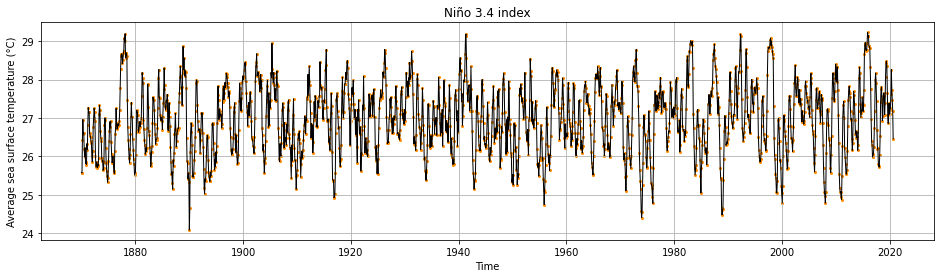

In [ ]:
# Plot the El Niño index

import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(datetimes,data_1d,c='k',lw=1)   # color options: https://matplotlib.org/3.3.2/gallery/color/named_colors.html
plt.scatter(datetimes,data_1d,s=4,c='darkorange')
plt.title('Niño 3.4 index')
plt.xlabel('Time')
plt.ylabel('Average sea surface temperature (°C)')
plt.grid()